Тестовое задание.
Cian junior


Нужно провести анализ данных (файл во вложении), сравнить положение Игрока 1 и Игрока 2 на рынке недвижимости в разбивке:
регионов 
типов сделки
категории недвижимости
сегментов клиентов (owner, SMB, АН)
в динамике

Преобразовать вводные данные в экселе в отчет, из которого наглядно можно сделать какие-то выводы. Описать наблюдения и выводы.


In [311]:
# !pip install pandas_ods_reader
import time
from pandas_ods_reader import read_ods
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [187]:
%%time
sheet_index = 1
df = read_ods(r'./test_cian.ods', sheet_index)

Wall time: 35.7 s


In [188]:
df.drop(['unnamed.3', 'unnamed.4', 'Calculation1'], axis=1, inplace=True)

In [46]:
df

,Компания,Категория,Регион,Тип сделки,Категория недвижимости,Рубрика,Неделя,Контент
0,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-01 до 2018-01-07,69.0
1,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-08 до 2018-01-14,63.0
2,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-15 до 2018-01-21,81.0
3,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-22 до 2018-01-28,86.0
4,Игрок 1,Большое агенство (201-1000),Челябинск,Аренда,Городская,Долгосрочная,С 2018-01-29 до 2018-02-04,86.0
...,...,...,...,...,...,...,...,...
104407,Игрок 2,Частный маклер (2-3),Воронеж,Продажа,Загородная,Вторичка,С 2019-10-21 до 2019-10-27,283.0
104408,Игрок 2,Частный маклер (2-3),Воронеж,Продажа,Загородная,Вторичка,С 2019-10-28 до 2019-11-03,282.0
104409,Игрок 2,Частный маклер (2-3),Воронеж,Продажа,Загородная,Вторичка,С 2019-11-04 до 2019-11-10,279.0
104410,Игрок 2,Частный маклер (2-3),Воронеж,Продажа,Загородная,Вторичка,С 2019-11-11 до 2019-11-17,284.0


In [189]:
df.columns

Index(['Компания', 'Категория ', 'Регион', 'Тип сделки',
       'Категория недвижимости', 'Рубрика', 'Неделя', 'Контент'],
      dtype='object')

In [190]:
df.rename(str, axis='columns', inplace=True)
df.rename(columns={'Категория ': "Категория"}, inplace=True)

In [102]:
df['Регион'].unique()

array(['Челябинск', 'Уфа', 'Тюмень', 'Сочи', 'Севастополь',
       'Санкт-Петербург', 'Самара', 'Ростов-на-Дону', 'Новосибирск',
       'Нижний Новгород', 'Москва', 'Краснодар', 'Казань', 'Екатеринбург',
       'Воронеж', 'Красноярск'], dtype=object)

In [237]:
df['Категория'].unique(), df['Тип сделки'].unique(), df['Категория недвижимости'].unique(), df['Рубрика'].unique()

(array(['Большое агенство (201-1000)', 'Крупное агенство (1000+)',
        'Крупный маклер (4-9)', 'Малое агенство (10-50)',
        'Собственник (1)', 'Среднее агенство (51-200)',
        'Частный маклер (2-3)'], dtype=object),
 array(['Аренда', 'Продажа'], dtype=object),
 array(['Городская', 'Загородная'], dtype=object),
 array(['Долгосрочная', 'Посуточная', 'Вторичка'], dtype=object))

Text(0.5, 1.0, 'Соотношение кол-ва объектов двух игроков')

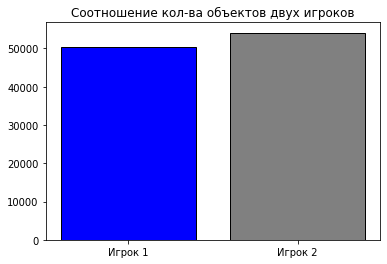

In [72]:
plt.bar((1,2), [len(df.loc[df['Компания'] == 'Игрок 1']),
                len(df.loc[df['Компания'] == 'Игрок 2'])], edgecolor='black', linewidth=1,
       tick_label=['Игрок 1', 'Игрок 2'], color=['b','grey'])
plt.title('Соотношение кол-ва объектов двух игроков')

##### Игрок 1 имеет меньшее количество объектов в целом

In [176]:
df_tmp1 = df.groupby(['Компания', 'Регион'],
           as_index=False).count()[['Компания', 'Регион', 'Категория']].rename(columns={'Категория': 'Количество'})

In [220]:
print(set(df_tmp1.loc[df_tmp1['Компания'] == 'Игрок 1']['Регион']) ^ set(df_tmp1.loc[df_tmp1['Компания'] == 'Игрок 2']['Регион']))

print(f"Количество городов Игрока 1: {len(df_tmp1.loc[df_tmp1['Компания'] == 'Игрок 1'])} \
      'Количество городов Игрока 2: {len(df_tmp1.loc[df_tmp1['Компания'] == 'Игрок 2'])}")

{'Красноярск'}
Количество городов Игрока 1: 15       'Количество городов Игрока 2: 16


In [225]:

print(f"Доля объектов в Красноярске у Игрока 2(%):")
print((df_tmp1.loc[(df_tmp1['Компания'] == 'Игрок 2') & (df_tmp1['Регион'] == 'Красноярск')]['Количество'] / df_tmp1.loc[(df_tmp1['Компания'] == 'Игрок 2')]['Количество'].values.sum() * 100).values)

Доля объектов в Красноярске у Игрока 2(%):
[6.68453151]


##### Игрок 1 не присутствует в Красноярске

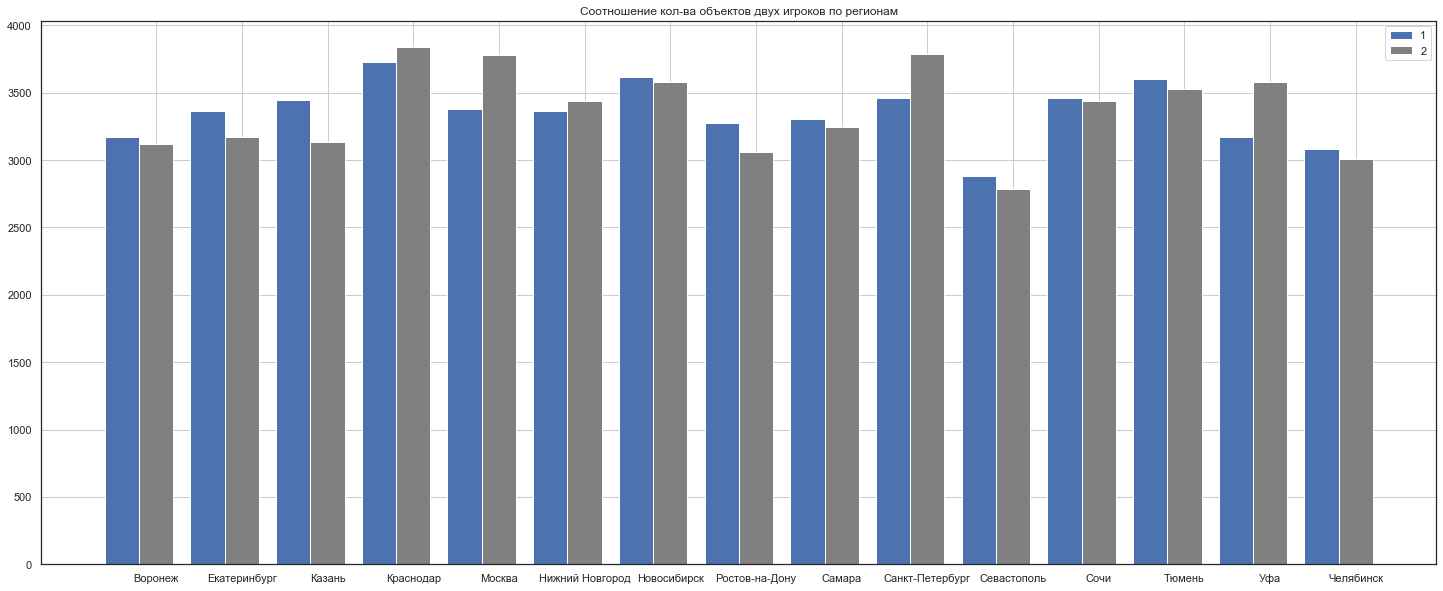

In [177]:
plt.figure(figsize=(25, 10))
x1 = np.arange(1, 16) - 0.2
x2 = np.arange(1, 16) + 0.2
y1 = df_tmp1.loc[df_tmp1['Компания'] == 'Игрок 1']['Количество'].tolist()
y2 = df_tmp1.loc[(df_tmp1['Компания'] == 'Игрок 2') & (df_tmp1['Регион'] != 'Красноярск')]['Количество'].tolist()

plt.bar(x1, y1, width = 0.4, color='b', label='1', tick_label=df_tmp1.loc[df_tmp1['Компания'] == 'Игрок 1']['Регион'].tolist())
plt.bar(x2, y2, width = 0.4, color='grey', label='2', tick_label=df_tmp1.loc[df_tmp1['Компания'] == 'Игрок 1']['Регион'].tolist())
plt.legend()
plt.title('Соотношение кол-ва объектов двух игроков по регионам')
plt.grid()

##### Игрок 1 имеет более значительный отрыв по поличеству объектов от Игрока 2 в Екатеринбурге, Казани, Ростове-На-Дону. Однако Игрок 1 значительно уступает Игроку 2 по количеству объектов в 2-х городах федерального значения Москве и Санкт-Петербурге, а также в Уфе и имеет незначительный перевес в свою сторону в Севастополе.

In [236]:
df_tmp2 = df.groupby(['Компания', 'Регион'],
           as_index=False).agg({'Контент': 'sum'})

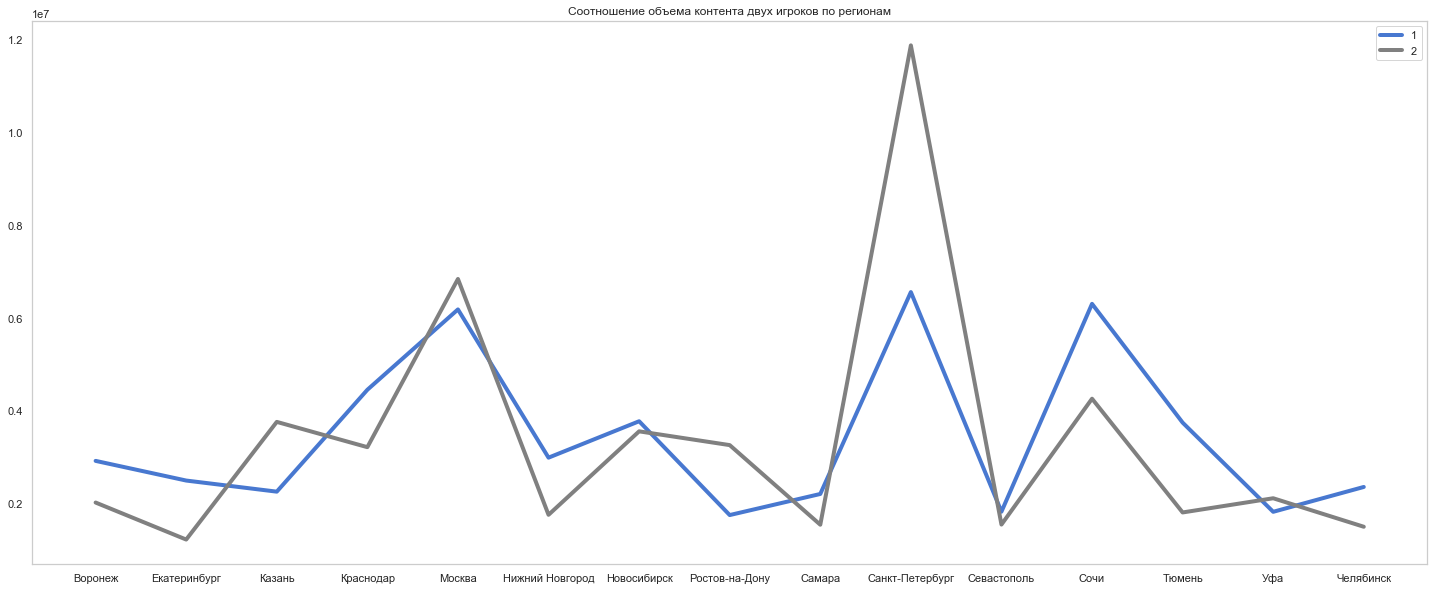

In [197]:
plt.figure(figsize=(25, 10))
plt.plot(df_tmp2.loc[df_tmp2['Компания'] == 'Игрок 1']['Регион'].tolist(),
         df_tmp2.loc[df_tmp2['Компания'] == 'Игрок 1']['Контент'].tolist(), color='b', linewidth=4, label='1')

plt.plot(df_tmp2.loc[(df_tmp2['Компания'] == 'Игрок 2') & (df_tmp2['Регион'] != 'Красноярск')]['Регион'].tolist(),
         df_tmp2.loc[(df_tmp2['Компания'] == 'Игрок 2') & (df_tmp2['Регион'] != 'Красноярск')]['Контент'].tolist(), 
         color='grey', linewidth=4, label='2')

plt.title('Соотношение объема контента двух игроков по регионам')
plt.legend()
plt.grid()

##### Игрок 2 имеет почти двухкратный перевес по объму контента в Санкт-Петербурге. В целом игроки сконцентрированы на 3 городах: Москве, Санкт-Петербурге и Сочи, причем присутствие игрока 1 в данных городах более сбалансированное.

In [194]:
df_tmp3 = df.groupby(['Компания', 'Тип сделки'],
           as_index=False).count()[['Компания', 'Тип сделки', 'Категория']]
df_tmp3

# agg({'Контент': 'sum'})

,Компания,Тип сделки,Категория
0,Игрок 1,Аренда,30791
1,Игрок 1,Продажа,19511
2,Игрок 2,Аренда,32351
3,Игрок 2,Продажа,21759


##### Игрок 2 имеет больше объектов и в аренде, и в продаже.

In [235]:
df_tmp4 = df.groupby(['Компания', 'Тип сделки', 'Регион'],
           as_index=False).count()[['Компания', 'Регион', 'Тип сделки', 'Категория']]

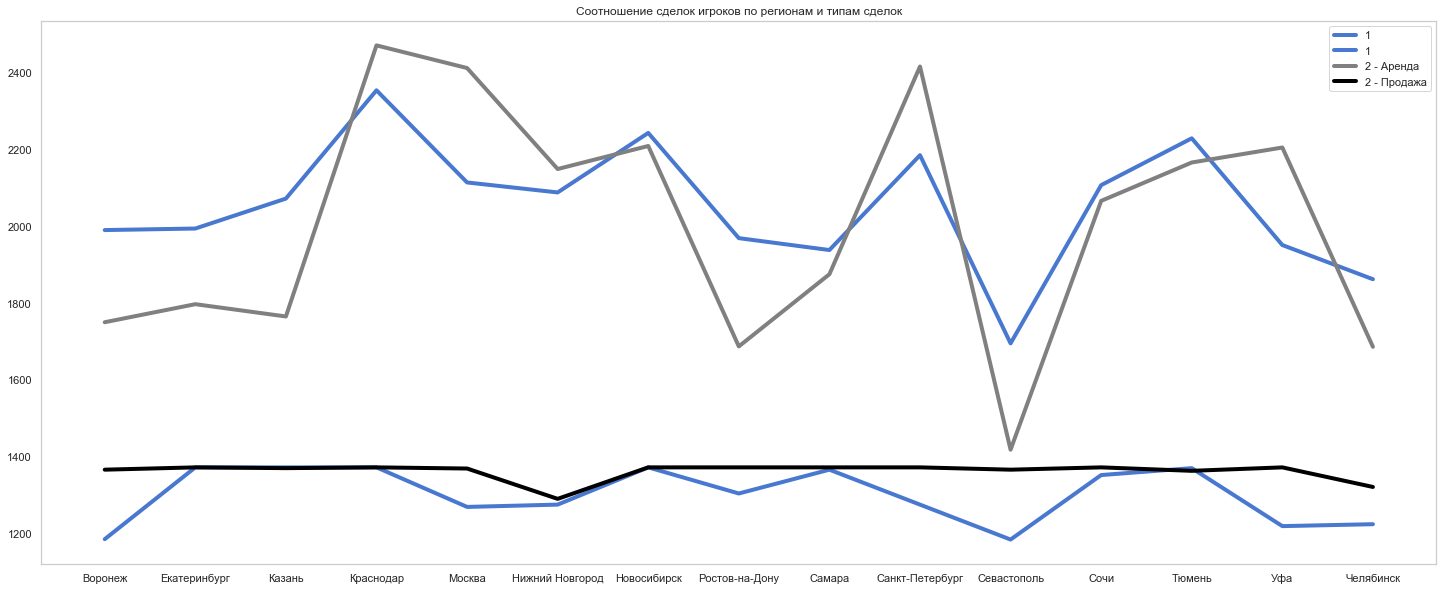

In [233]:
plt.figure(figsize=(25, 10))
plt.plot(df_tmp4.loc[(df_tmp4['Компания'] == 'Игрок 1') & (df_tmp4['Тип сделки'] == 'Аренда')]['Регион'].tolist(),
         df_tmp4.loc[(df_tmp4['Компания'] == 'Игрок 1') & (df_tmp4['Тип сделки'] == 'Аренда')]['Категория'].tolist(),
         color='b', linewidth=4, label='1')

plt.plot(df_tmp4.loc[(df_tmp4['Компания'] == 'Игрок 1') & (df_tmp4['Тип сделки'] == 'Продажа')]['Регион'].tolist(),
         df_tmp4.loc[(df_tmp4['Компания'] == 'Игрок 1') & (df_tmp4['Тип сделки'] == 'Продажа')]['Категория'].tolist(),
         color='b', linewidth=4, label='1')

plt.plot(df_tmp4.loc[(df_tmp4['Компания'] == 'Игрок 2') & (df_tmp4['Тип сделки'] == 'Аренда') & \
                     (df_tmp4['Регион'] != 'Красноярск')]['Регион'].tolist(),
         df_tmp4.loc[(df_tmp4['Компания'] == 'Игрок 2') & (df_tmp4['Тип сделки'] == 'Аренда') & \
                     (df_tmp4['Регион'] != 'Красноярск')]['Категория'].tolist(),
         color='grey', linewidth=4, label='2 - Аренда')

plt.plot(df_tmp4.loc[(df_tmp4['Компания'] == 'Игрок 2') & \
                     (df_tmp4['Тип сделки'] == 'Продажа') & \
                    (df_tmp4['Регион'] != 'Красноярск')]['Регион'].tolist(),
         
         df_tmp4.loc[(df_tmp4['Компания'] == 'Игрок 2') & \
                     (df_tmp4['Тип сделки'] == 'Продажа') & \
                    (df_tmp4['Регион'] != 'Красноярск')]['Категория'].tolist(),
         color='black', linewidth=4, label='2 - Продажа')

# plt.plot(df_tmp4.loc[(df_tmp4['Компания'] == 'Игрок 2') & (df_tmp4['Регион'] != 'Красноярск')]['Регион'].tolist(),
#          df_tmp4.loc[(df_tmp4['Компания'] == 'Игрок 2') & (df_tmp4['Регион'] != 'Красноярск')]['Контент'].tolist(), 
#          color='grey', linewidth=4, label='2')

plt.title('Соотношение сделок игроков по регионам и типам сделок')
plt.legend()
plt.grid()

##### Игрок 2 в отличие от Игрока 1 имеет стабильный уровень продаж почти во всех городах. Игрок 2 опережает Игрока 1 в количестве сданых в аренду объектов в городах Москва и Санкт-Петербург.

In [246]:
df_tmp5 = df.groupby(['Компания', 'Категория недвижимости', 'Регион'],
           as_index=False).count()[['Компания', 'Категория недвижимости', 'Регион', 'Категория']]

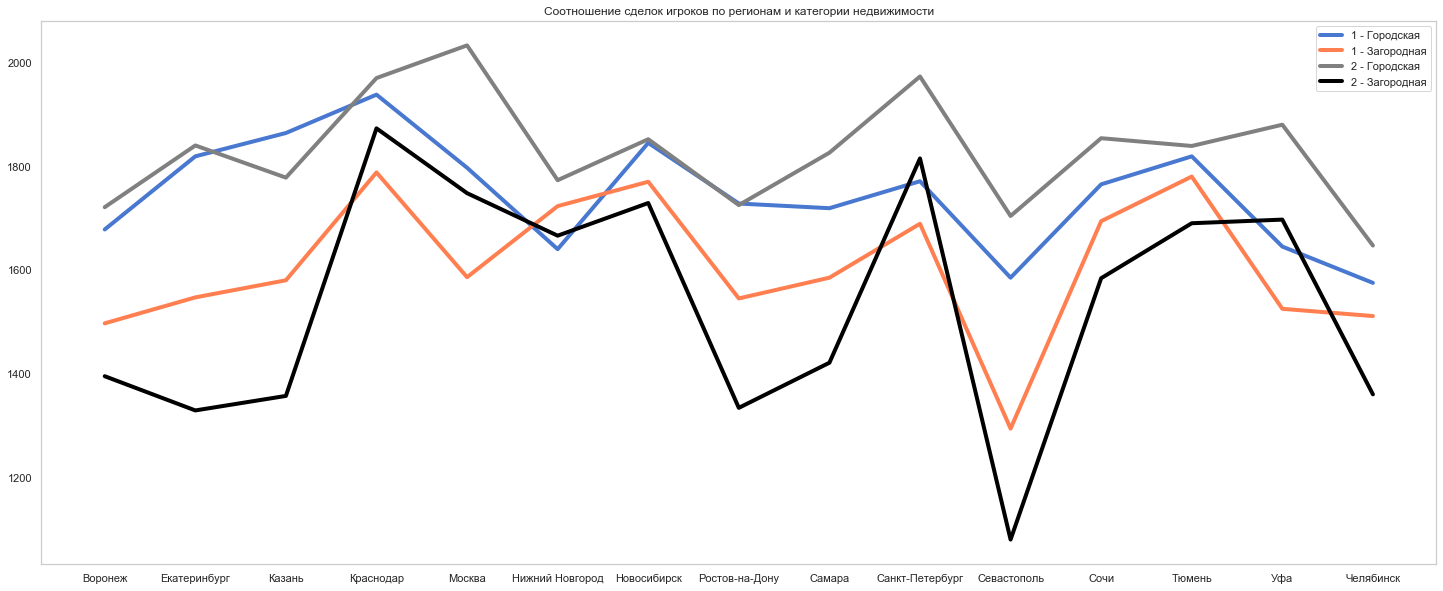

In [247]:
plt.figure(figsize=(25, 10))
plt.plot(df_tmp5.loc[(df_tmp5['Компания'] == 'Игрок 1') & (df_tmp5['Категория недвижимости'] == 'Городская')]['Регион'].tolist(),
         df_tmp5.loc[(df_tmp5['Компания'] == 'Игрок 1') & (df_tmp5['Категория недвижимости'] == 'Городская')]['Категория'].tolist(),
         color='b', linewidth=4, label='1 - Городская')

plt.plot(df_tmp5.loc[(df_tmp5['Компания'] == 'Игрок 1') & (df_tmp5['Категория недвижимости'] == 'Загородная')]['Регион'].tolist(),
         df_tmp5.loc[(df_tmp5['Компания'] == 'Игрок 1') & (df_tmp5['Категория недвижимости'] == 'Загородная')]['Категория'].tolist(),
         color='coral', linewidth=4, label='1 - Загородная')

plt.plot(df_tmp5.loc[(df_tmp5['Компания'] == 'Игрок 2') & (df_tmp5['Категория недвижимости'] == 'Городская') & \
                     (df_tmp5['Регион'] != 'Красноярск')]['Регион'].tolist(),
         df_tmp5.loc[(df_tmp5['Компания'] == 'Игрок 2') & (df_tmp5['Категория недвижимости'] == 'Городская') & \
                     (df_tmp5['Регион'] != 'Красноярск')]['Категория'].tolist(),
         color='grey', linewidth=4, label='2 - Городская')

plt.plot(df_tmp5.loc[(df_tmp5['Компания'] == 'Игрок 2') & \
                     (df_tmp5['Категория недвижимости'] == 'Загородная') & \
                    (df_tmp5['Регион'] != 'Красноярск')]['Регион'].tolist(),
         
         df_tmp5.loc[(df_tmp5['Компания'] == 'Игрок 2') & \
                     (df_tmp5['Категория недвижимости'] == 'Загородная') & \
                    (df_tmp5['Регион'] != 'Красноярск')]['Категория'].tolist(),
         color='black', linewidth=4, label='2 - Загородная')

# plt.plot(df_tmp4.loc[(df_tmp4['Компания'] == 'Игрок 2') & (df_tmp4['Регион'] != 'Красноярск')]['Регион'].tolist(),
#          df_tmp4.loc[(df_tmp4['Компания'] == 'Игрок 2') & (df_tmp4['Регион'] != 'Красноярск')]['Контент'].tolist(), 
#          color='grey', linewidth=4, label='2')

plt.title('Соотношение сделок игроков по регионам и категории недвижимости')
plt.legend()
plt.grid()

##### Игрок 2 лучше Игрока 1 представлен в Севастополе, но значительно уступает ему в количестве загородных объектов. Игрок 2, за исключением Казани, лучше представлен на городских территориях и в то же время в ряде регионов (Воронеж, Екатеринбург, Казань, Ростов-На-Дону, Севастополь, Челябинск, Самара) существенно отстает и не занимает лидирующих позиций в количестве загородных объектов.

In [252]:
df_tmp6 = df.groupby(['Компания', 'Категория', 'Регион'],
           as_index=False).count()[['Компания', 'Категория', 'Регион', 'Контент']]
# Контент - это количество в данной группировке

In [271]:
df_tmp6.loc[(df_tmp6['Компания'] == 'Игрок 1') & (df_tmp6['Категория'] == 'Собственник (1)')]['Контент'].sum()# / df_tmp6.loc[df_tmp6['Компания'] == 'Игрок 1']['Контент'].sum()

8580

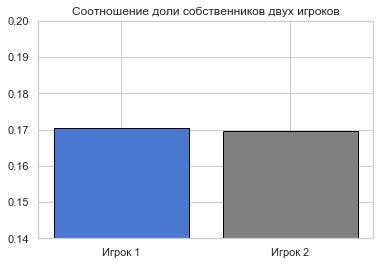

In [275]:
plt.bar((1,2),
    [df_tmp6.loc[(df_tmp6['Компания'] == 'Игрок 1') & (df_tmp6['Категория'] == 'Собственник (1)')]['Контент'].sum() / df_tmp6.loc[df_tmp6['Компания'] == 'Игрок 1']['Контент'].sum(),
    df_tmp6.loc[(df_tmp6['Компания'] == 'Игрок 2') & (df_tmp6['Категория'] == 'Собственник (1)')]['Контент'].sum()  / df_tmp6.loc[df_tmp6['Компания'] == 'Игрок 2']['Контент'].sum()],

edgecolor='black', linewidth=1,
       tick_label=['Игрок 1', 'Игрок 2'], color=['b','grey'])
plt.title('Соотношение доли собственников двух игроков')
plt.ylim(0.14, 0.2)
plt.show()

In [262]:
df_tmp6.loc[(df_tmp6['Компания'] == 'Игрок 1') & (df_tmp6['Категория'] == 'Собственник (1)')]

,Компания,Категория,Регион,Контент,Доля собственников
60,Игрок 1,Собственник (1),Воронеж,572,0
61,Игрок 1,Собственник (1),Екатеринбург,572,0
62,Игрок 1,Собственник (1),Казань,572,0
63,Игрок 1,Собственник (1),Краснодар,572,0
64,Игрок 1,Собственник (1),Москва,572,0
65,Игрок 1,Собственник (1),Нижний Новгород,572,0
66,Игрок 1,Собственник (1),Новосибирск,572,0
67,Игрок 1,Собственник (1),Ростов-на-Дону,572,0
68,Игрок 1,Собственник (1),Самара,572,0
69,Игрок 1,Собственник (1),Санкт-Петербург,572,0


In [263]:
df_tmp6.loc[(df_tmp6['Компания'] == 'Игрок 2') & (df_tmp6['Категория'] == 'Собственник (1)')]

,Компания,Категория,Регион,Контент,Доля собственников
169,Игрок 2,Собственник (1),Воронеж,540,0
170,Игрок 2,Собственник (1),Екатеринбург,584,0
171,Игрок 2,Собственник (1),Казань,557,0
172,Игрок 2,Собственник (1),Краснодар,588,0
173,Игрок 2,Собственник (1),Красноярск,588,0
174,Игрок 2,Собственник (1),Москва,588,0
175,Игрок 2,Собственник (1),Нижний Новгород,588,0
176,Игрок 2,Собственник (1),Новосибирск,579,0
177,Игрок 2,Собственник (1),Ростов-на-Дону,569,0
178,Игрок 2,Собственник (1),Самара,588,0


##### У обоих игроков есть ограничение на присутствие собственников в регионах, при этом у Игрока 2 данное ограничение по количеству объектов собственников ниже, чем у Игрока 1.

In [ ]:
(array(['Большое агенство (201-1000)', 'Крупное агенство (1000+)',
        'Крупный маклер (4-9)', 'Малое агенство (10-50)',
        'Собственник (1)', 'Среднее агенство (51-200)',
        'Частный маклер (2-3)'], dtype=object),

In [324]:
list_AN = ['Большое агенство (201-1000)','Крупное агенство (1000+)','Среднее агенство (51-200)','Малое агенство (10-50)']

df_tmp7 = df_tmp6.loc[(df_tmp6['Компания'] == 'Игрок 1') & (df_tmp6['Категория'].isin(list_AN))]
df_tmp8 = df_tmp6.loc[(df_tmp6['Компания'] == 'Игрок 2') & (df_tmp6['Категория'].isin(list_AN))]


# df_tmp7.groupby(['Категория', '')

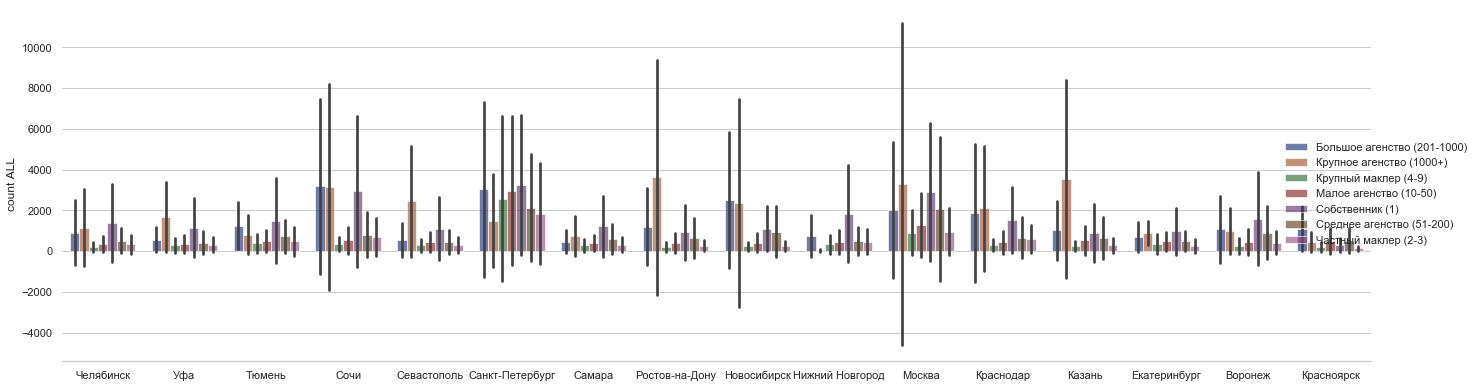

In [327]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="Регион", y="Контент", hue="Категория",
    ci="sd", palette="dark", alpha=.6, height=6, size=40
)
g.despine(left=True)

g.fig.set_size_inches(20,5)
g.set_axis_labels("", "count ALL")
g.legend.set_title("")

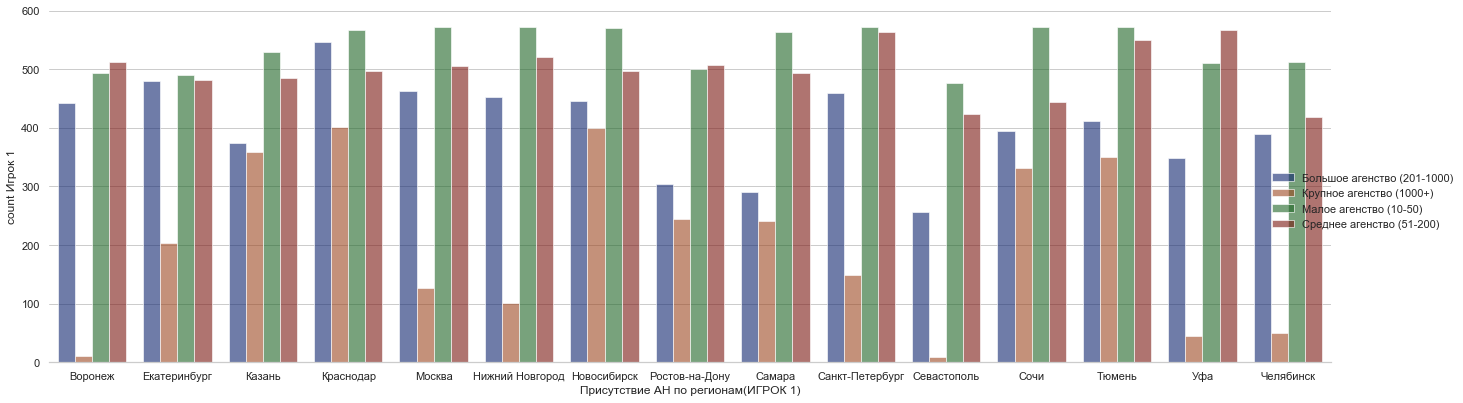

In [329]:
g2 = sns.catplot(
    data=df_tmp7, kind="bar",
    x="Регион", y="Контент", hue="Категория",
    ci="sd", palette="dark", alpha=.6, height=6, size=30
)
g2.despine(left=True)

g2.fig.set_size_inches(20,5)
g2.set_axis_labels("Присутствие АН по регионам(ИГРОК 1)", "count Игрок 1")
g2.legend.set_title("")

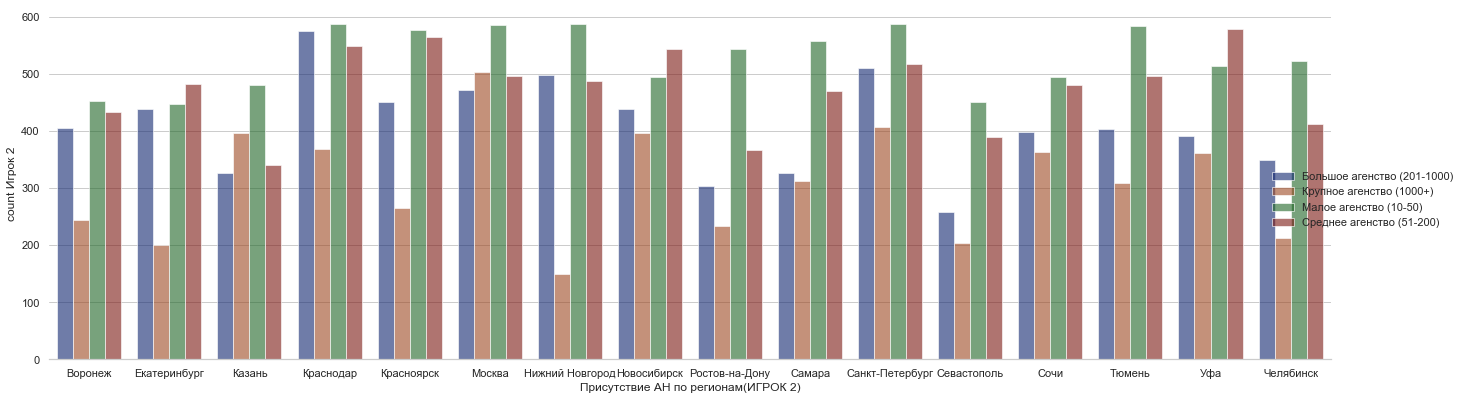

In [330]:
g3 = sns.catplot(
    data=df_tmp8, kind="bar",
    x="Регион", y="Контент", hue="Категория",
    ci="sd", palette="dark", alpha=.6, height=6, size=30
)
g3.despine(left=True)

g3.fig.set_size_inches(20,5)
g3.set_axis_labels("Присутствие АН по регионам(ИГРОК 2)", "count Игрок 2")
g3.legend.set_title("")

##### В целом количество агенств в регионах примерно(грубо) одинаковое, однако у Игрока 2 по сравнению с игроком 1 присутствует значительно большее количество крупных агентств в городах Воронеж, Москва, Санкт-Петербург, Севастополь, Уфа, Челябинск.

#### ВЫВОДЫ
###### На основании исследованных данных можно сделать вывод, что Игрок 1 имеет меньшее количество объектов в целом, в том числе ввиду отсутствия игрока 1 в Красноярске, а такте наличии вектора развития в сторону загородных объектов(которых физически меньше, чем городских). 

###### Можно отметить, что Игрок 1 имеет умеренное присутствие в Москве, Санкт-Петербурге и Сочи, имеет стабильные продажи почти во всех городах, не занимает лидирующих позиций в аренде объектов в городах Москва и Санкт-Петербург, имеет меньшее количество крупных агентств. Данные обстоятельнства могут говорить о том, что политика компании более умеренная, чем у Игрока 2, который значительно нарастил свое присутствие в 2 городах фед.значения и имеет большее количество объектов и в аренде, и в продаже преимущественно на городских террориях крупных городов.
